## Data Preprocessing
The purpose of this notebook is to demo the data preprocessing flow to preprocess signal traces from the STEAD seismic signal dataset for use in CNN model training. See `data_preprocessing` module for more.

### Environment setup

In [1]:
import os
import sys
sys.path.append('../')

from PIL import Image

from earthquake_detection.data_preprocessing import DataPreprocessing

### Get paths to saved dataset files

In [2]:
# Get data directory path to the locally saved STEAD dataset files from saved environment variable
data_dir_path = os.environ.get('STEAD_DATA_DIR_PATH', 'key does not exist')

### Data preprocessing

In [3]:
# Initialize DataPreprocessing object
preproc = DataPreprocessing(data_dir_path)

In [4]:
# Data preprocessing
raw_signals, imgs, metadata = preproc.preprocess(subsample_n=5000)

Data preprocessing for subsample of signal data of size 5000
Fetching data paths from directory
Parsing metadata from csv files


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:08<00:00,  1.34s/it]


Number of total traces: 1265657
Number of earthquake traces: 1030231
Number of noise traces: 235426
Fetching subsample of traces from hdf5 files
Parsing traces from h5py filepaths


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:02<00:00,  2.93it/s]


Creating spectrograms from signal traces and saving to array


 28%|████████████████████████████████▏                                                                                | 1422/5000 [00:36<01:18, 45.63it/s]/opt/miniconda3/lib/python3.12/site-packages/matplotlib/axes/_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5000/5000 [02:06<00:00, 39.61it/s]


### Results

In [5]:
len(raw_signals)

5000

In [6]:
len (imgs)

5000

In [7]:
metadata

,network_code,receiver_code,receiver_type,receiver_latitude,receiver_longitude,receiver_elevation_m,p_arrival_sample,p_status,p_weight,p_travel_sec,...,source_magnitude_author,source_mechanism_strike_dip_rake,source_distance_deg,source_distance_km,back_azimuth_deg,snr_db,coda_end_sample,trace_start_time,trace_category,chunk
trace_name,,,,,,,,,,,,,,,,,,,,,
B087.PB_20110415160922_EV,PB,B087,EH,33.495500,-116.602667,1139.0,500.0,manual,0.58,3.080000,...,CI,NaN,0.14590,16.23,96.6,[15.89999962 17.20000076 6.5 ],[[1896.]],09:23.3,earthquake_local,1
B084.PB_20070610234247_EV,PB,B084,EH,33.611570,-116.456370,1271.0,400.0,manual,0.52,17.879999,...,CI,NaN,0.97140,108.03,159.7,[27.79999924 27.39999962 29.29999924],[[2513.]],42:48.8,earthquake_local,1
AOPR.PR_20180718125903_EV,PR,AOPR,BH,18.346645,-66.753975,355.1,600.0,manual,0.19,10.900000,...,NaN,NaN,0.54550,60.55,189.0,[26.89999962 27.29999924 24.60000038],[[2966.]],59:03.1,earthquake_local,1
B084.PB_20130324214626_EV,PB,B084,HH,33.611570,-116.456370,1271.0,900.0,manual,0.63,2.430000,...,NaN,NaN,0.09953,11.07,182.0,[24.60000038 19.10000038 29.60000038],[[1534.]],46:27.9,earthquake_local,1
B086.PB_20121122004827_EV,PB,B086,EH,33.557500,-116.531000,1392.0,900.0,manual,0.62,10.240000,...,CI,NaN,0.55260,61.45,320.4,[30.60000038 16.5 21. ],[[2323.]],48:28.2,earthquake_local,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LMC.NC_201603170755_NO,NC,LMC,HH,41.274160,-122.121970,1062.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-03-17 07:55:00,noise,6
CRH.NC_201105272200_NO,NC,CRH,HN,37.858840,-121.992640,259.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-05-27 22:00:00,noise,6
GARY.5H_20180115060442_NO,5H,GARY,EH,37.924000,-78.015900,130.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-15 06:04:42,noise,6


#### Example images created through preprocessing

------------------ 
 Example image 0: earthquake_local 
------------------


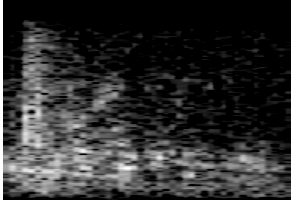

network_code                                                           PB
receiver_code                                                        B087
receiver_type                                                          EH
receiver_latitude                                                 33.4955
receiver_longitude                                            -116.602667
receiver_elevation_m                                               1139.0
p_arrival_sample                                                    500.0
p_status                                                           manual
p_weight                                                             0.58
p_travel_sec                                                         3.08
s_arrival_sample                                                    724.0
s_status                                                           manual
s_weight                                                             0.58
source_id                             

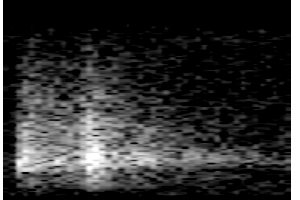

network_code                                                           PB
receiver_code                                                        B084
receiver_type                                                          EH
receiver_latitude                                                33.61157
receiver_longitude                                             -116.45637
receiver_elevation_m                                               1271.0
p_arrival_sample                                                    400.0
p_status                                                           manual
p_weight                                                             0.52
p_travel_sec                                                    17.879999
s_arrival_sample                                                   1676.0
s_status                                                           manual
s_weight                                                             0.52
source_id                             

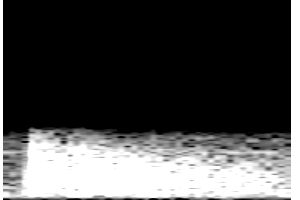

network_code                                                           PR
receiver_code                                                        AOPR
receiver_type                                                          BH
receiver_latitude                                               18.346645
receiver_longitude                                             -66.753975
receiver_elevation_m                                                355.1
p_arrival_sample                                                    600.0
p_status                                                           manual
p_weight                                                             0.19
p_travel_sec                                                         10.9
s_arrival_sample                                                   1426.0
s_status                                                           manual
s_weight                                                              0.0
source_id                             

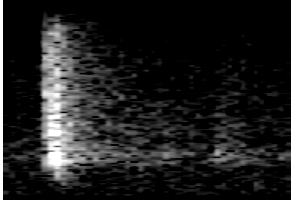

network_code                                                           PB
receiver_code                                                        B084
receiver_type                                                          HH
receiver_latitude                                                33.61157
receiver_longitude                                             -116.45637
receiver_elevation_m                                               1271.0
p_arrival_sample                                                    900.0
p_status                                                           manual
p_weight                                                             0.63
p_travel_sec                                                         2.43
s_arrival_sample                                                   1075.0
s_status                                                           manual
s_weight                                                             0.59
source_id                             

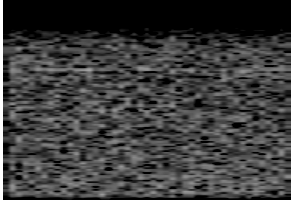

network_code                                         NC
receiver_code                                       CRH
receiver_type                                        HN
receiver_latitude                              37.85884
receiver_longitude                           -121.99264
receiver_elevation_m                              259.0
p_arrival_sample                                    NaN
p_status                                            NaN
p_weight                                            NaN
p_travel_sec                                        NaN
s_arrival_sample                                    NaN
s_status                                            NaN
s_weight                                            NaN
source_id                                           NaN
source_origin_time                                  NaN
source_origin_uncertainty_sec                       NaN
source_latitude                                     NaN
source_longitude                                

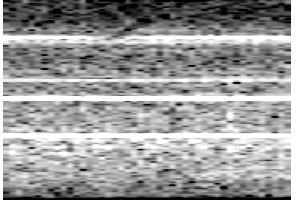

network_code                                         5H
receiver_code                                      GARY
receiver_type                                        EH
receiver_latitude                                37.924
receiver_longitude                             -78.0159
receiver_elevation_m                              130.0
p_arrival_sample                                    NaN
p_status                                            NaN
p_weight                                            NaN
p_travel_sec                                        NaN
s_arrival_sample                                    NaN
s_status                                            NaN
s_weight                                            NaN
source_id                                           NaN
source_origin_time                                  NaN
source_origin_uncertainty_sec                       NaN
source_latitude                                     NaN
source_longitude                                

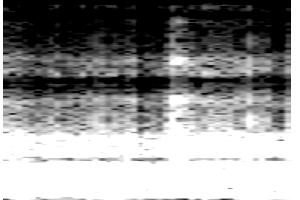

network_code                                         IU
receiver_code                                       AFI
receiver_type                                        BH
receiver_latitude                              -13.9085
receiver_longitude                            -171.7827
receiver_elevation_m                              706.0
p_arrival_sample                                    NaN
p_status                                            NaN
p_weight                                            NaN
p_travel_sec                                        NaN
s_arrival_sample                                    NaN
s_status                                            NaN
s_weight                                            NaN
source_id                                           NaN
source_origin_time                                  NaN
source_origin_uncertainty_sec                       NaN
source_latitude                                     NaN
source_longitude                                

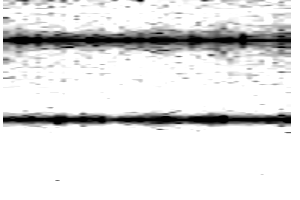

network_code                                         AU
receiver_code                                       MCQ
receiver_type                                        BH
receiver_latitude                              -54.4986
receiver_longitude                             158.9561
receiver_elevation_m                               14.0
p_arrival_sample                                    NaN
p_status                                            NaN
p_weight                                            NaN
p_travel_sec                                        NaN
s_arrival_sample                                    NaN
s_status                                            NaN
s_weight                                            NaN
source_id                                           NaN
source_origin_time                                  NaN
source_origin_uncertainty_sec                       NaN
source_latitude                                     NaN
source_longitude                                

In [15]:
for i in [0,1,2,3,4996,4997,4998,4999]:
    signal_type = metadata.iloc[i]['trace_category']
    print(f'------------------ \n Example image {i}: {signal_type} \n------------------')
    im = Image.fromarray(imgs[i])
    display(im)
    print(metadata.iloc[i])